<h1><center>Module 15: Lesson 4 Data Cleaning 3: outliers assignment</center></h1>

## Assignment

In this assignment, you'll continue working with the [U.S. Education Dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home) from Kaggle. The data gives detailed state level information on several facets of education on an annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above. 

Access this data using the Thinkful database using these credentials:

postgres_user = 'dsbc_student'<br>
postgres_pw = '7\*.8G9QH21'<br>
postgres_host = '142.93.121.174'<br>
postgres_port = '5432'<br>
postgres_db = 'useducation'<br>

Don't forget to apply the most suitable missing value filling techniques from the previous checkpoint to the data. Provide the answers to the following only *after* you've addressed missing values!

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Consider the two variables: *TOTAL_REVENUE* and *TOTAL_EXPENDITURE*. Do these variables have outlier values?
2. If you detect outliers in the *TOTAL_REVENUE* and *TOTAL_EXPENDITURE* variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.
3. Create another variable by subtracting the original *TOTAL_EXPENDITURE* from *TOTAL_REVENUE* (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.
4. Now create another variable by subtracting the *TOTAL_EXPENDITURE* from *TOTAL_REVENUE*. This time, use the outlier eliminated versions of *TOTAL_EXPENDITURE* from *TOTAL_REVENUE*. In this newly created variable, can you find any outliers? If so, eliminate them.
5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?
6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?


_________________________________________________________________________________________________________________

##### Import packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

pd.set_option('display.max_columns', 500)

warnings.filterwarnings('ignore')

##### Grab data

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

_________________________________________________________________________________________________________________

##### Fix Missing Values

In [11]:
# create a fill_list of all columns...    
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

# create dataframe **states** that finds unique value of state in original dataframe...
states = education_df["STATE"].unique()

# loop through state value in states and interpolate values...
for state in states:
    education_df.loc[education_df["STATE"] == state, fill_list] = education_df.loc[education_df["STATE"] == state, fill_list].interpolate()

# we drop the null values after interpolation
education_df.dropna(inplace=True)

##### Question 1

* Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

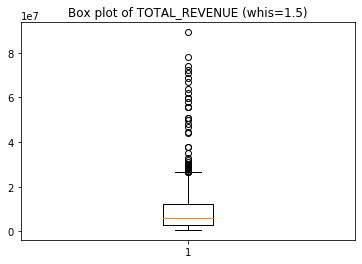

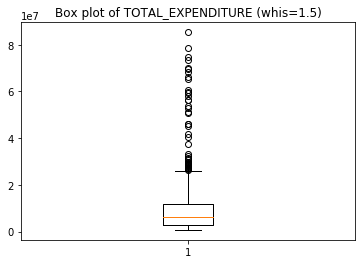

In [20]:
plt.boxplot(education_df["TOTAL_REVENUE"])
plt.title("Box plot of TOTAL_REVENUE (whis=1.5)")
plt.show()

plt.boxplot(education_df["TOTAL_EXPENDITURE"])
plt.title("Box plot of TOTAL_EXPENDITURE (whis=1.5)")
plt.show()

With a box plot set to the whiskers being 1.5, we would say yes there are a significant number of outliers. The whiskers being set to 1.5 means that anything 1.5 standard deviation above the 3rd quartile and below the first quartile is considered an outlier.

##### Question 2

* If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

we can **winsorize** the values, meaning that any value above a specific percentile is removed.

In [21]:
#import the winsorize function...
from scipy.stats.mstats import winsorize

In [26]:
#winsorize such that any observation above the 95th percentile is removed...
winsorized_revenue = winsorize(education_df["TOTAL_REVENUE"], (0, 0.05))

winsorized_expenditure = winsorize(education_df["TOTAL_EXPENDITURE"], (0, 0.05))

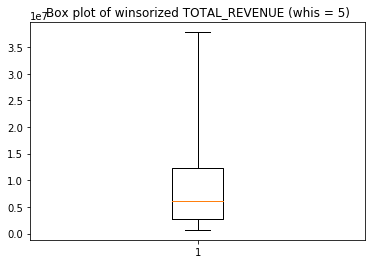

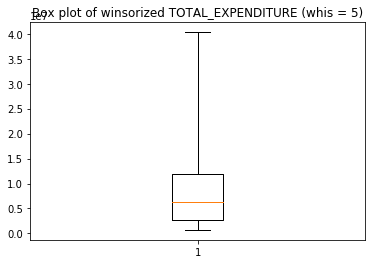

In [28]:
plt.boxplot(winsorized_revenue, whis = 5)
plt.title("Box plot of winsorized TOTAL_REVENUE (whis = 5)")
plt.show()

plt.boxplot(winsorized_expenditure, whis = 5)
plt.title("Box plot of winsorized TOTAL_EXPENDITURE (whis = 5)")
plt.show()

##### Question 3

* Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

In [29]:
# creating another variable that is equals to TOTAL_EXPENDITURE minus TOTAL_REVENUE...
education_df['another_variable'] = education_df['TOTAL_REVENUE'] - education_df['TOTAL_EXPENDITURE']

In [30]:
education_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,another_variable
209,1996_ALABAMA,ALABAMA,1996,735912.0,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,935115.0,322883.0,286699.0,9633.0,60949.0,57098.0,58305.0,42510.0,469370.0,207980.0,686983.0,211.646974,256.594863,210.920767,260.276441,-207170.0
211,1996_ARIZONA,ARIZONA,1996,764681.0,4143304.0,378917.0,1798363.0,1966024.0,4391555.0,1860007.0,1193260.0,220650.0,877190.0,4495.0,64613.0,62793.0,60514.0,42041.0,511925.0,210289.0,726709.0,217.575940,267.874834,206.529788,263.283638,-248251.0
212,1996_ARKANSAS,ARKANSAS,1996,452907.0,2183384.0,192152.0,1296247.0,694985.0,2297381.0,1264275.0,636106.0,127007.0,203555.0,1980.0,36442.0,33855.0,37064.0,27613.0,283883.0,131997.0,417860.0,215.846436,261.652745,208.837716,271.834590,-113997.0
213,1996_CALIFORNIA,CALIFORNIA,1996,5460484.0,31282981.0,2603882.0,17061474.0,11617625.0,31561692.0,16880730.0,9222569.0,2362407.0,2580639.0,73233.0,469965.0,435217.0,406456.0,298669.0,3516572.0,1525618.0,5115423.0,209.129083,262.772478,201.912591,269.197451,-278711.0
214,1996_COLORADO,COLORADO,1996,655679.0,3891203.0,194998.0,1664676.0,2031529.0,4075165.0,2052264.0,1127563.0,143767.0,588209.0,12520.0,50707.0,52524.0,52269.0,37179.0,423510.0,185700.0,621730.0,225.805858,275.608214,221.653243,268.168154,-183962.0


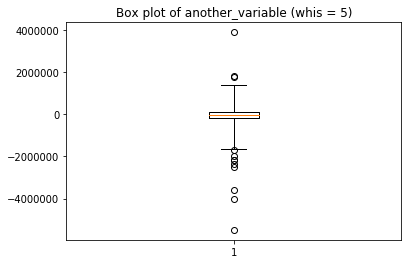

In [32]:
plt.boxplot(education_df["another_variable"], whis = 5)
plt.title("Box plot of another_variable (whis = 5)")
plt.show()

There are just s few variables above the 3rd quartile and quite a few below the 1st. I will winsorize these variables in order to remove them from the dataset.

In [35]:
# winsorize another_variable for anything above the 95th percentile
winsorized_another_variable = winsorize(education_df["another_variable"], (0.05, 0.05))

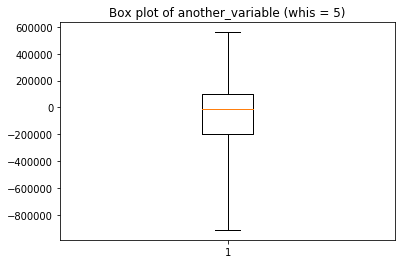

In [36]:
plt.boxplot(winsorized_another_variable, whis = 5)
plt.title("Box plot of another_variable (whis = 5)")
plt.show()

##### Question 4

* Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

In [37]:
another_another_variable = winsorized_revenue - winsorized_expenditure

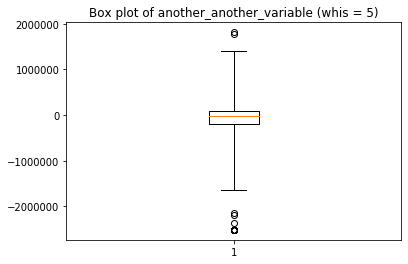

In [40]:
plt.boxplot(another_another_variable, whis = 5)
plt.title("Box plot of another_another_variable (whis = 5)")
plt.show()

There are in fact outliers in another_another_variable. We can winsorize those bad boys and get them out of here.

In [43]:
winsorized_another_another_variable = winsorize(another_another_variable, (0.15, 0.05))

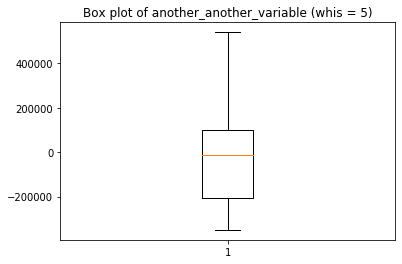

In [44]:
plt.boxplot(winsorized_another_another_variable, whis = 5)
plt.title("Box plot of another_another_variable (whis = 5)")
plt.show()

##### Question 5

* Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

In [45]:
# create a dataframe that compares the .describe() for the previous questions...
pd.DataFrame({"original_budget": education_df['another_variable'], "winsorized_budget1": winsorized_another_variable,
              "winsorized_budget2": winsorized_another_another_variable}).describe()

,original_budget,winsorized_budget1,winsorized_budget2
count,4.660000e+02,466.000000,466.000000
mean,-8.094882e+04,-58733.012876,-17124.963519
std,6.144222e+05,341300.816505,243700.617417
min,-5.487742e+06,-913765.000000,-350132.000000
25%,-1.965748e+05,-196574.750000,-204775.000000
50%,-8.872500e+03,-8872.500000,-12823.500000
75%,1.013948e+05,101394.750000,98263.000000
max,3.897129e+06,560511.000000,540055.000000


There are substantial differences in the descriptive statistics.

##### Question 6

* If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

> I think that it makes more sense to winsorize the variables together after you have subtracted instead of first winsorizing and then subtracting, as we did in the fourth question. I think that subtracting first and the winsorizing keeps the variables all much more constant and thereby allows for a more consistent defininition of "outlier" to be created and applied.